<a href="https://colab.research.google.com/github/Seam5/BDA/blob/main/w9_%EC%A0%95%EA%B7%9C%ED%91%9C%ED%98%84%EC%8B%9D%2C_%ED%8C%A8%ED%84%B4%EC%B6%94%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 정규표현식
- 원하는 패턴을 추출하고 싶을 경우 정규식 패턴을 이용하여 전처리, 추출
- 패키지 : re match, search
- ('패턴', 문자열)

In [ ]:
import re

In [ ]:
re.match('Hello', 'Hello, world!')

<re.Match object; span=(0, 5), match='Hello'>

In [ ]:
re.match('ab', 'ab, Hello, world!')

<re.Match object; span=(0, 2), match='ab'>

In [ ]:
re.search('Hello', 'ab Hello')

<re.Match object; span=(3, 8), match='Hello'>

- 숫자 : [0-9]
- '*', ;+': 반복

In [ ]:
re.search('[0-9]*', '12345, hihihi')

<re.Match object; span=(0, 5), match='12345'>

In [ ]:
re.search('[0-9]+', '12345, hihihi')

<re.Match object; span=(0, 5), match='12345'>

### 문자열 개수
- 문자{개수}
- a{5} a가 최대 5 번 반복

In [ ]:
re.match('a{5}', 'aaaaa10')

<re.Match object; span=(0, 5), match='aaaaa'>

### 전화번호 패턴 인식
- 모든 숫자 3개 + 모든 숫자 4개 + 모든숫자 4개

In [ ]:
re.match('[0-9]{3}-[0-9]{4}-[0-9]{4}', '010-1234-5678')

<re.Match object; span=(0, 13), match='010-1234-5678'>

In [ ]:
re.match('[0-9]*-[0-9]*-[0-9]*', '010-1234-56718') # 길이 지정 아니고 반복이니까 5개도 인식됨

<re.Match object; span=(0, 14), match='010-1234-56718'>

### 문자 (알파벳)
- 숫자와 동일 [a-z]

In [ ]:
re.match('[a-z]*', 'hihi1234')

<re.Match object; span=(0, 4), match='hihi'>

In [ ]:
re.match('[a-z0-9]*', 'hihi1234') #1234도 찾음

<re.Match object; span=(0, 8), match='hihi1234'>

### 문자(한글)
- ㄱ-ㅎ, ㅏ-ㅣ 따로 사용할 수 있음

In [ ]:
re.search('[가-힣]+', 'www.python.rg/안녕하세요?')

<re.Match object; span=(14, 19), match='안녕하세요'>

### 특수문자
- 앞에 \ 붙이면 됨

In [ ]:
re.search('\?+', '?안녕!')

<re.Match object; span=(0, 1), match='?'>

### 자주 사용하는 표현식
- \d : 모든 숫자
- \D : 모든 숫자 제외
- not[^0-9] : 모든 숫자 제외
- \w[a-zA-Z0-9_] : 영문, 대소문자, 숫자 밑줄문자

In [ ]:
re.match('\d+', '12345')

<re.Match object; span=(0, 5), match='12345'>

In [ ]:
re.match('\w+', '12345abc')

<re.Match object; span=(0, 8), match='12345abc'>

### 공백 처리
- \s 또는 \S

In [ ]:
re.match('[a-zA-Z0-9\s]+', 'hi 12345')

<re.Match object; span=(0, 8), match='hi 12345'>

### 그룹 사용

In [ ]:
ab = re.match('([0-9]+) ([a-z]+)', '1234 abc')

In [ ]:
ab.group(1) # 앞 group match

'1234'

In [ ]:
ab.group(2) # 뒤 group match

'abc'

In [ ]:
ab. group(0) # 앞 뒤 모두 match

'1234 abc'

## 정규표현식으로 이메일 찾기 예제
- 1. 영어 소문자, 숫자만 허용 (대문자 X)
- 2. 문자열로 시작
- 3. @기업명.com으로 끝난다.
- 4. 기업명에는 문자열만 들어감
- 'python@gmail.com' 찾기

In [ ]:
str = 'dkj 12 python@gmail.com 안녕'
pat = re.compile(r'\b[a-z][a-z0-9]*@[a-z]*\.com\b')
email = re.findall(pat, str)
print(email)

## 특수문자 '.' 앞에 \ 붙여야 함
## 문자열 중에 찾을 때는 ^와 $보다는 \b'표현식'\b 로 찾기

['python@gmail.com']


### 텍스트 분석
- 카운팅 기반, 빈도 수치화
- 텍스트를 어떻게 수치화 할 것인가?
- 주어, 동사, 형용사, 구성 성분으로 나누어 수치화
- 패키지 활용 : nltk, okt, twitter 등


In [ ]:
import pandas as pd
survey = pd.read_csv('/content/survey_설문지.csv')

In [ ]:
survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


In [ ]:
survey['comment']

0            역앞에 젊은이들이 모여있다(AA역)
1          운동할 수 있는 장소가 있는 것이 좋다
2                      육아 지원이 좋다
3     어린이집에 바로 입원할 수 있다(대기아동 없음)
4                    역앞 상가가 쓸쓸하다
                 ...            
81        초등학교 운동장이 잔디밭이라서 아주 좋다
82    홈페이지에서도 설문지를 투고할 수 있게 해 달라
83               공원에 놀이기구가 너무 적다
84                공원을 더 늘렸으면 좋겠다
85             역앞에 주차장이 적다, 불편하다
Name: comment, Length: 86, dtype: object

In [ ]:
survey['comment'] = survey['comment'].str.replace('[A-Za-z]', "", regex = True)
## 영어 없앰 / regex = True : 정규표현식 사용하여 대체 작업 진행하도록 지정

In [ ]:
survey['len'] = survey['comment'].str.len() # 전체 리뷰에 대한 길이 보여주는 열 생성

In [ ]:
survey

,datetime,comment,satisfaction,len
0,2019-03-11,역앞에 젊은이들이 모여있다(역),1,17.0
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21.0
2,2019-02-18,육아 지원이 좋다,5,9.0
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4,26.0
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11.0
...,...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5,22.0
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2,26.0
83,2019-01-09,공원에 놀이기구가 너무 적다,1,15.0
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2,14.0


In [ ]:
import matplotlib.pyplot as plt

(array([19., 19., 20., 11.,  7.,  3.,  4.,  0.,  0.,  1.]),
 array([ 6. , 11.6, 17.2, 22.8, 28.4, 34. , 39.6, 45.2, 50.8, 56.4, 62. ]),
 <BarContainer object of 10 artists>)

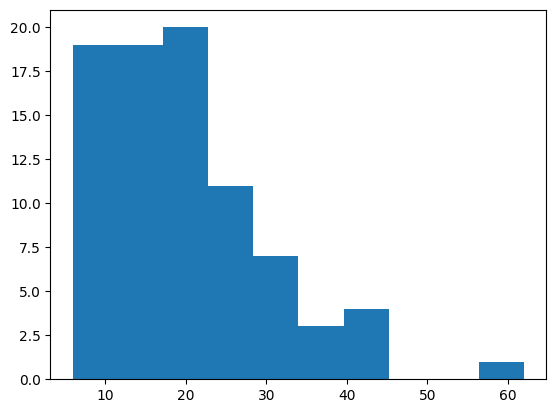

In [ ]:
plt.hist(survey['len'])

## 과제 1
- 정규표현식

In [ ]:
import re

1. Caret "^"
- 특정 문자열로 시작하는 string 찾음

In [ ]:
re.match('^a', 'abc') # match

<re.Match object; span=(0, 1), match='a'>

In [ ]:
re.match('^a', 'bca') # no match

2. Dollar "$"
- 특정 문자열로 끝나는 string 찾음

In [ ]:
re.match('\w+a$', 'bca') # match

<re.Match object; span=(0, 3), match='bca'>

In [ ]:
re.match('\w+a$', 'abc') # no match

3. Braces "{n,m}"
- 최소 n번, 최대 m번 패턴 반복

In [ ]:
re.match('a{2,3}', 'a') # no match

In [ ]:
re.match('a{2,3}', 'aaaa') # 1 match

<re.Match object; span=(0, 3), match='aaa'>

4. "\w"
- any alphanumeric character (특수기호 빼고 대부분 찾음)

In [ ]:
target_str = 'Emma is a baseball player who was born on June 17'

pat = re.compile(r'\b\w{8}\b') # 8글자 단어 찾기

result = pat.search(target_str)
print(result)

<re.Match object; span=(10, 18), match='baseball'>


5. "|"
- matches either a or b

In [ ]:
target_str = 'Kelly loves banana and apple'

pat = re.compile(r'\ba\w*\b|\b\w*a\b') # a로 시작하거나 a로 끝나는 단어 찾기 (or 개념)
result = pat.findall(target_str)

print(result)

['banana', 'and', 'apple']


## 과제 2
- 서베이 데이터 간단한 시각화 및 전처리

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
survey = pd.read_csv('/content/survey_설문지.csv')

In [ ]:
survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


In [ ]:
survey['comment'] = survey['comment'].str.replace('[a-zA-Z0-9]', "", regex = True) # 영어, 숫자 제거

In [ ]:
survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


In [ ]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datetime      86 non-null     object
 1   comment       84 non-null     object
 2   satisfaction  86 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.1+ KB


In [ ]:
survey['datetime'] = pd.to_datetime(survey['datetime']) # datetime type 변환

In [ ]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      86 non-null     datetime64[ns]
 1   comment       84 non-null     object        
 2   satisfaction  86 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.1+ KB


In [ ]:
survey_dt = survey.set_index('datetime') # datetime 인덱스 지정

In [ ]:
survey_dt = survey_dt.sort_values(by = 'datetime')

In [ ]:
survey_dt

,comment,satisfaction
datetime,,
2019-01-01,관광 명소가 없다,1
2019-01-02,육아가 쉽다,4
2019-01-03,슈퍼까지 가는게 힘들어,1
2019-01-04,NaN,2
2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...
2019-04-28,골목이 좁고 무섭다,1
2019-04-29,상가의 활성화 활동을 좀더 행정이 뒷받침해 주길 바란다,1
2019-04-30,집세가 합리적이다,4


In [ ]:
survey_sf = survey_dt.resample('M').sum()
survey_sf

<ipython-input-12-e397f236c659>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  survey_sf = survey_dt.resample('M').sum()


,satisfaction
datetime,
2019-01-31,56
2019-02-28,69
2019-03-31,56
2019-04-30,44


In [ ]:
new_values = [56/31, 69/28, 56/31, 44/30]
survey_sf['Satisfaction'] = new_values
del survey_sf['satisfaction']
survey_sf

,Satisfaction
datetime,
2019-01-31,1.806452
2019-02-28,2.464286
2019-03-31,1.806452
2019-04-30,1.466667


In [ ]:
survey_sf.index = survey_sf.index.strftime('%Y-%m') # datetime 형태 월까지로 변경

<Axes: xlabel='datetime'>

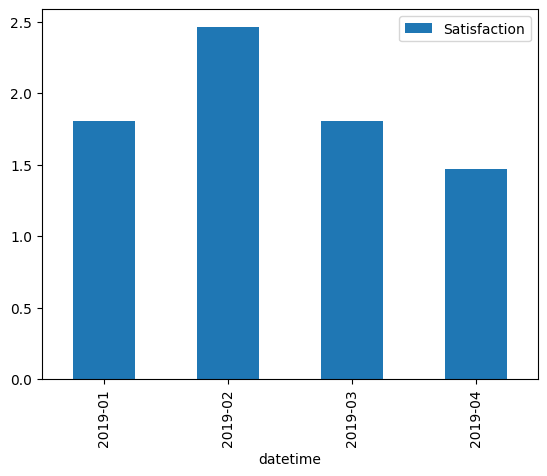

In [ ]:
survey_sf.plot(kind = 'bar')

- 월 별 평균 만족도로 2월이 가장 높고, 4월이 가장 낮음

In [ ]:
survey_m = survey_dt[['comment']]
survey_m.resample('M').sum()

,comment
datetime,
2019-01-31,관광 명소가 없다육아가 쉽다슈퍼까지 가는게 힘들어역앞 상가가 쓸쓸하다소방활동이 활발...
2019-02-28,자치단체의 활동이 활발해서 안심하고 살 수 있다놀 장소가 없다상가에 더 많은 카페를...
2019-03-31,버스 노선을 늘려 주길 바란다데이트 명소를 갖고 싶다공원이 더 필요하다사이클링 코스...
2019-04-30,"역앞에 주차장이 적다, 불편하다시청 담당자가 무뚝뚝해서 마음에 들지 않는다스포츠 센..."


In [ ]:
text = survey_m.loc['2019-02-28','comment']
text # 2월 comment 문자열 추출

'  에 신호등이 없는 사거리가 때문에 사고가 날것 같아 두렵다. 신호를 해달라.'

In [ ]:
count = text.count('신호')
count # '신호' 관련 comment 2회

2